# Семинар 2 - Цветовые пространства, гистограммы изображений, интегральные изображения

***

**Данный семинар содержит оцениваемые упражнения и вопросы.**

Система оценивания: доля правильно решенных упражений. Максимальный балл, соответственно, 1.

В упражнениях оценивается два аспекта:
1. Код проходит assert'ы (если они есть)
2. Код корректен с точки зрения логики

Вопросы также оцениваются. Ответ на них нужно записывать в соответствующие markdown-ячейки.

Источник используемого аэрофотоснимка: https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg

In [1]:
from pathlib import Path

import cv2
import numpy as np

import matplotlib.pyplot as plt

In [2]:
AERIAL_IMG_PATH = "data/aerial_image.jpg"
SUNFLOWER_IMG_PATH = "data/sunflower.jpg"

if not Path(AERIAL_IMG_PATH).exists() or not Path(SUNFLOWER_IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_02/data .

## 1. Цветовые пространства

Наиболее распространенным представлением цвета пикселя является пространство RGB. В таком представлении цвет представлен тремя числами: интенсивностями красного, зеленого и синего базисных цветов.

In [3]:
img = cv2.imread(SUNFLOWER_IMG_PATH)

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

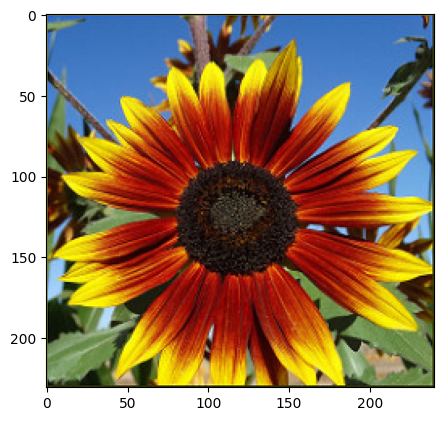

In [5]:
plt.figure(figsize=[5, 5])
plt.imshow(img_rgb)

cvtColor поддерживает конвертацию между множеством других цветовых схем. К примеру, чтобы получить серое изобаржение из цветного достаточно:

In [6]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

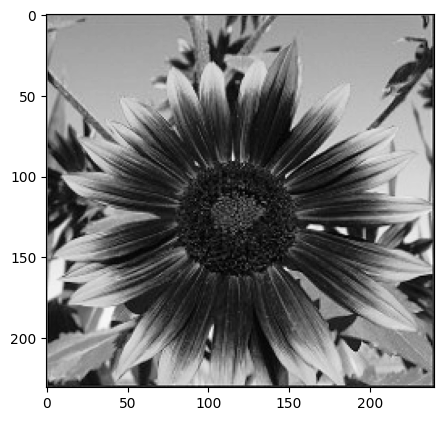

In [7]:
plt.figure(figsize=[5, 5])
plt.imshow(img_gray, cmap='Greys_r')

Если не предполагается использовать информацию о цвете пикселей, то можно сразу загрузить изображение в оттенках серого:

In [8]:
img_gray = cv2.imread(SUNFLOWER_IMG_PATH, cv2.IMREAD_GRAYSCALE)

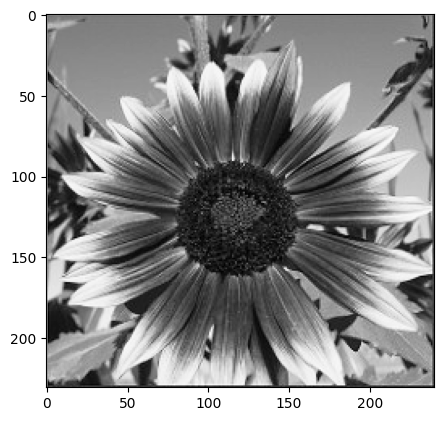

In [9]:
plt.figure(figsize=[5, 5])
plt.imshow(img_gray, cmap='Greys_r')

серое изображение - двумерный массив:

In [10]:
print('type(img_gray) = ', type(img_gray))
print('img_gray.shape = ', img_gray.shape)
print('img_gray.dtype = ', img_gray.dtype)

type(img_gray) =  <class 'numpy.ndarray'>
img_gray.shape =  (231, 240)
img_gray.dtype =  uint8


## Упражнение 1: RGB $\to$ gray

**Это и все последующие упражения - оцениваемые, для самостоятельной работы.**

Реализуйте функцию преобразования цветного изображения в формате RGB в серое

In [11]:
def convert_rgb_to_grayscale(img_rgb):
    R,G,B = img_rgb[:,:,0].astype(float), img_rgb[:,:,1].astype(float), img_rgb[:,:,2].astype(float)
    gray = ((0.2989 * R).astype(float) + 
            (0.5870 * G).astype(float) + 
            (0.1140 * B).astype(float)).round().astype(np.uint8)
    print(f"difference = {np.setdiff1d(gray, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY))}\n dtypes = {gray.dtype} {cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY).dtype} \n shapes = {gray.shape} {cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY).shape}")

    return gray

In [12]:
assert((cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) == convert_rgb_to_grayscale(img_rgb)).all())

difference = []
 dtypes = uint8 uint8 
 shapes = (231, 240) (231, 240)


AssertionError: 

## Вопрос 1

**Этот и все последующие вопросы - оцениваемые, для самостоятельной работы.**

Почему бы не использовать при преобразовании в серое просто среднее арифметическое?

**Ответ:** Считается, что вычисленный таким образом цвет лучше всего подходит для человеческого глаза, поскольку яркость каждой компоненты глаз воспринимает по-разному.


Кроме RGB/BGR и grayscale существуют и другие цветовые представления. Преобразования между ними можно осуществлять с помощью библиотеки OpenCV следующим способом:

## RGB $\to$ HSV

In [13]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

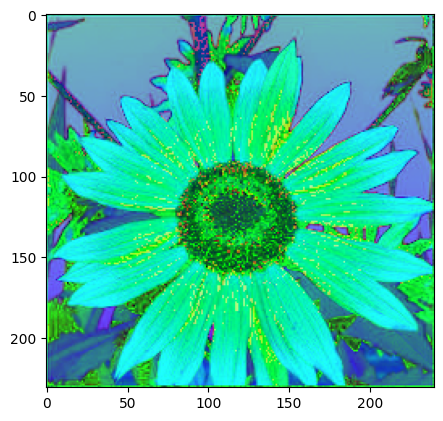

In [14]:
plt.figure(figsize=[5, 5])
plt.imshow(img_hsv)

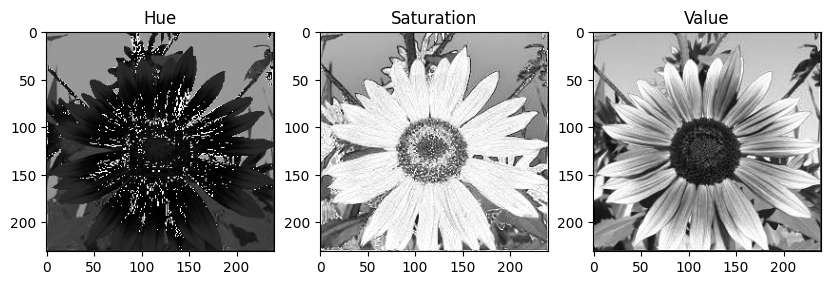

In [15]:
# Split the image into color channels
h, s, v = cv2.split(img_hsv)

plt.figure(figsize=[10, 30])
plt.subplot(131)
plt.imshow(h, cmap="gray")
plt.title('Hue')

plt.subplot(132)
plt.imshow(s, cmap="gray")
plt.title('Saturation')

plt.subplot(133)
plt.imshow(v, cmap="gray")
plt.title('Value')

# Display the plot
plt.show()


## Упражнение 2

Попробуйте другие цветовые пространства, конвертация в которые реализована в OpenCV.

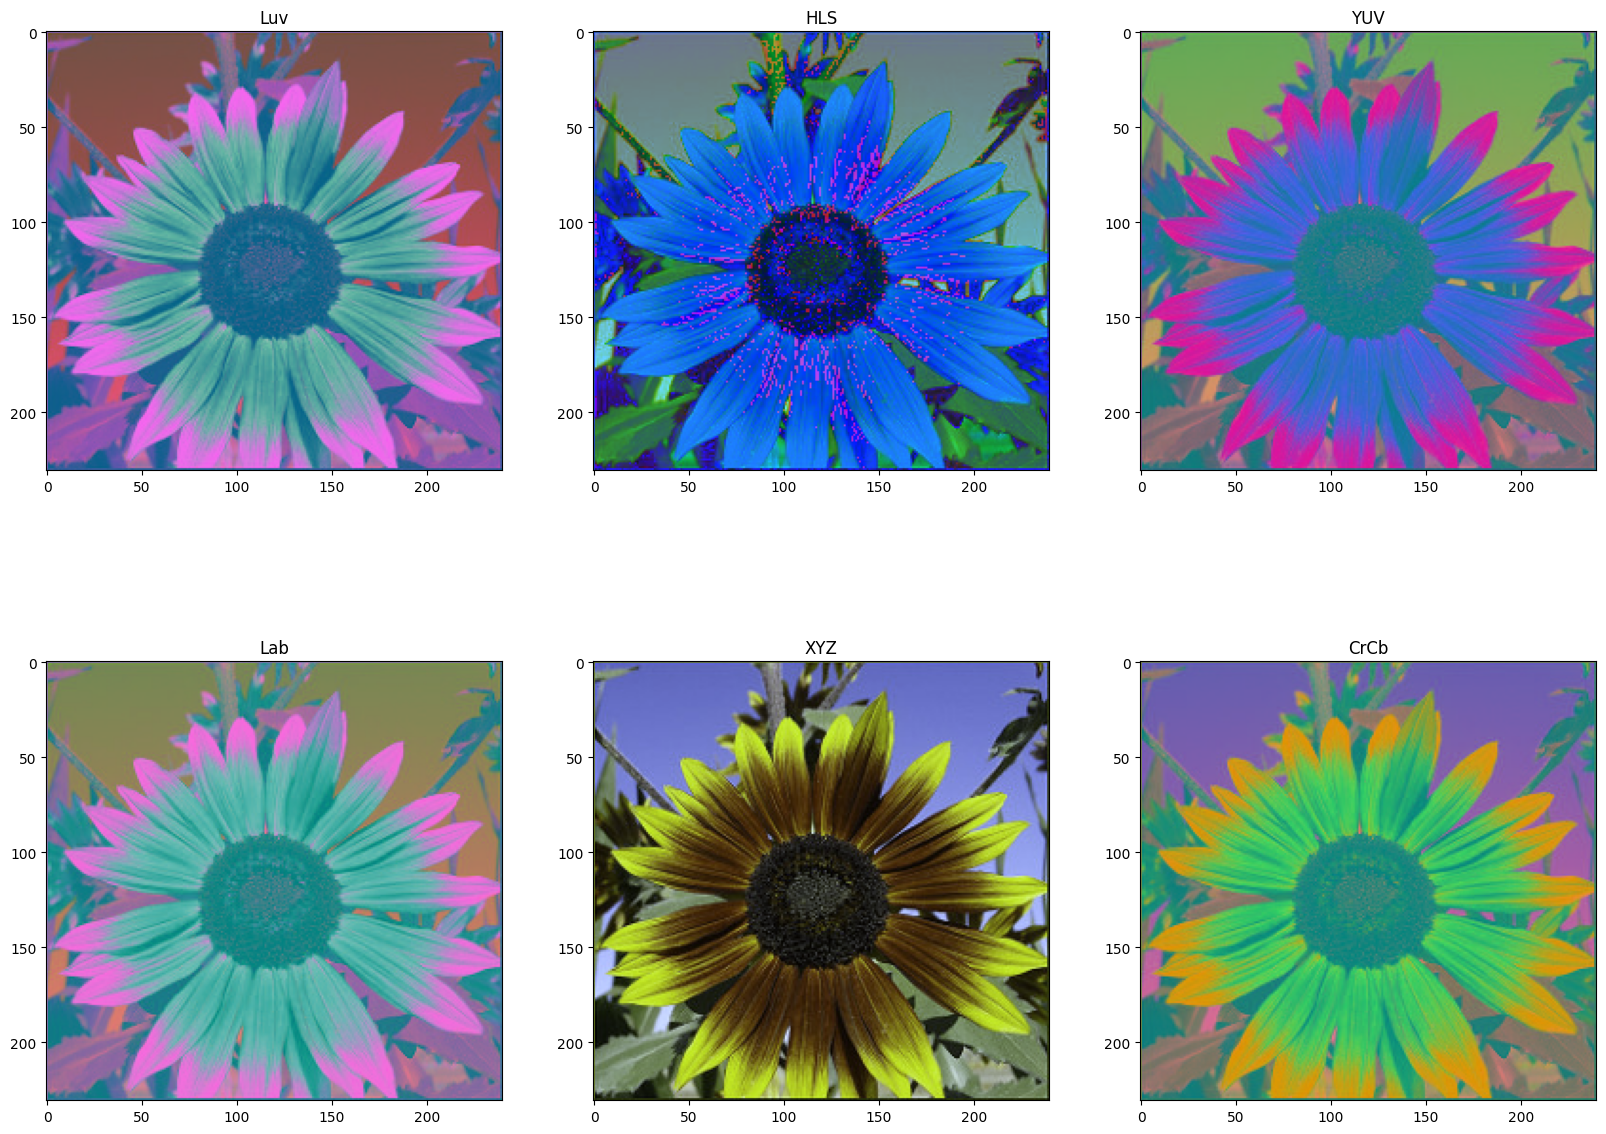

In [16]:
# your code here
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2Lab )
img_xyz = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2XYZ )
img_YCrCb  = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb )
img_Luv  = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2Luv )  
img_HLS  = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HLS ) 
img_YUV  = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV )
 
plt.figure(figsize=[20, 30])
plt.subplot(131)
plt.imshow(img_lab)
plt.title('Lab')

plt.subplot(132)
plt.imshow(img_xyz)
plt.title('XYZ')

plt.subplot(133)
plt.imshow(img_YCrCb)
plt.title('CrCb')

plt.subplot(231)
plt.imshow(img_Luv)
plt.title('Luv')

plt.subplot(232)
plt.imshow(img_HLS)
plt.title('HLS')

plt.subplot(233)
plt.imshow(img_YUV)
plt.title('YUV')

# Display the plot
plt.show()


## Вопрос 2

В каких задачах переход из RGB в другое цветовое пространство может быть полезным?

**Ответ:** В области научных исследований цветовые пространства могут использоваться для анализа спектральных данных, в компьютерной графике цветовые пространства могут использоваться для эффективного представления и обработки цветов.К примеру, цветовое пространство Lab часто используется для реализации цветовых преобразований в графических движках.

## Гистограмма изображения

Напомним, что гистограммой изображения называется функция, показыващая количество пикселей изображения с заданным в качестве аргумента значением интенсивности:

$$
    h(v) = \sum_{x = 0}^{W - 1} \sum_{y = 0}^{H - 1} [f(x, y) = v] 
$$

Если дополнительно потребовать, чтобы $\sum_{v = 0}^{255} h(v) = 1$, то $h$ будет представлять функцию плотности распределения интенсивности на изображении.

Определим вспомогательную функцию, позволяющую визализировать гистограмму:

In [17]:
def visualize_hist(hist):
    plt.figure(figsize=[20, 5])
    plt.bar(np.arange(len(hist)), hist / hist.sum())

Рассчитать гистограмму можно с помощью встроенной функции OpenCV:

In [18]:
hist_cv = cv2.calcHist([img_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

Результат представляет собой обычный массив длины 256:

In [19]:
print('hist_cv.shape = ', hist_cv.shape)

hist_cv.shape =  (256,)


и выглядит следующим образом:

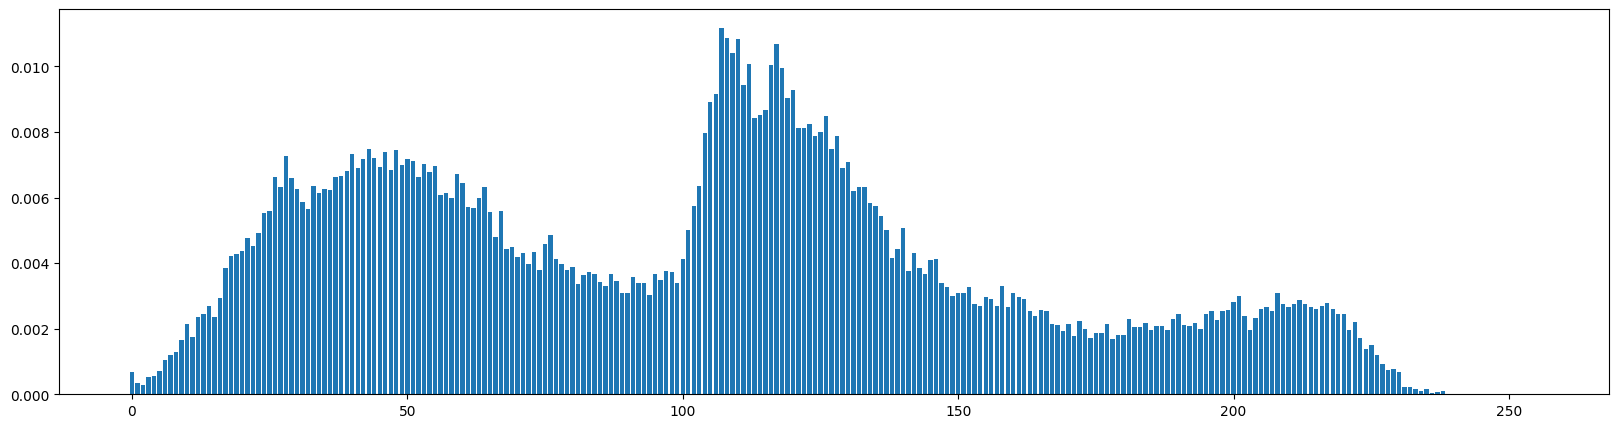

In [20]:
visualize_hist(hist_cv)

## Упражнение 3: Построение гистограммы

Реализуйте функцию для расчета гистограммы изображения. Используйте ее для визуализации трех каналов RGB изображения.

In [21]:
def compute_hist(img):
    hist = np.zeros(256)

    for i in img:
        for j in i:
            hist[j] += 1

    return hist

In [22]:
hist_gray = compute_hist(img_gray)

hist_r = compute_hist(img_rgb[:, :, 0])
hist_g = compute_hist(img_rgb[:, :, 1])
hist_b = compute_hist(img_rgb[:, :, 2])

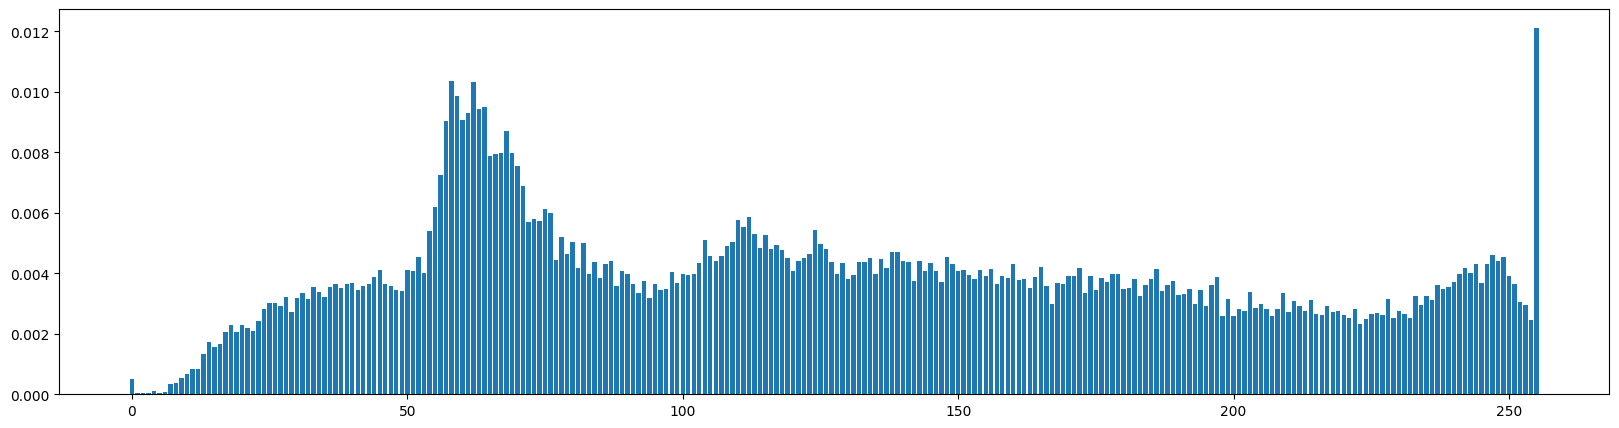

In [23]:
visualize_hist(hist_r)

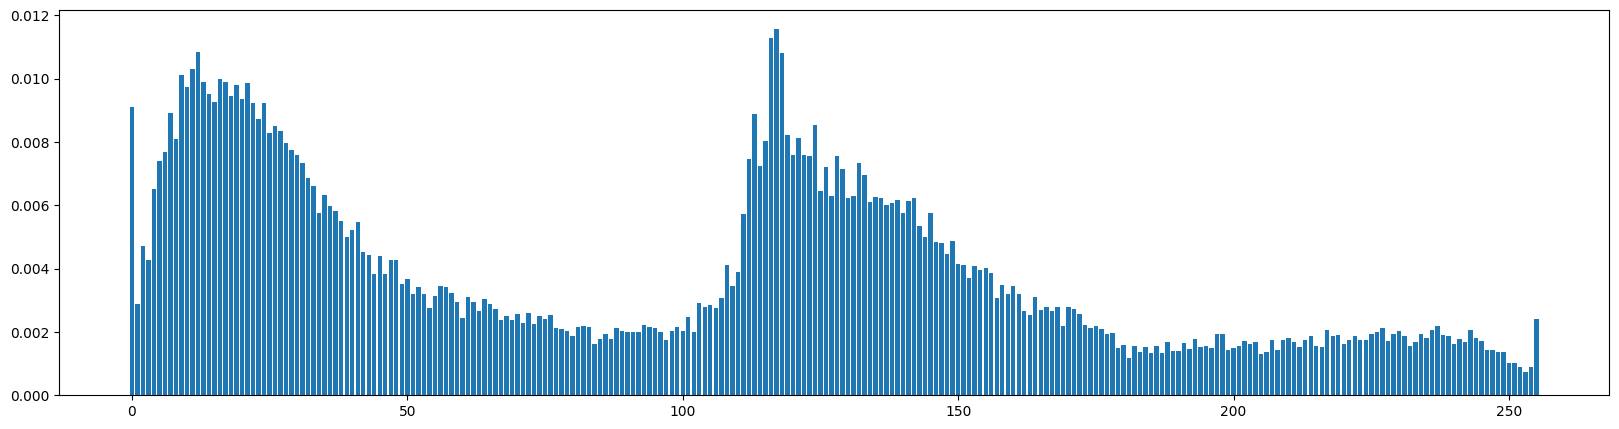

In [24]:
visualize_hist(hist_g)

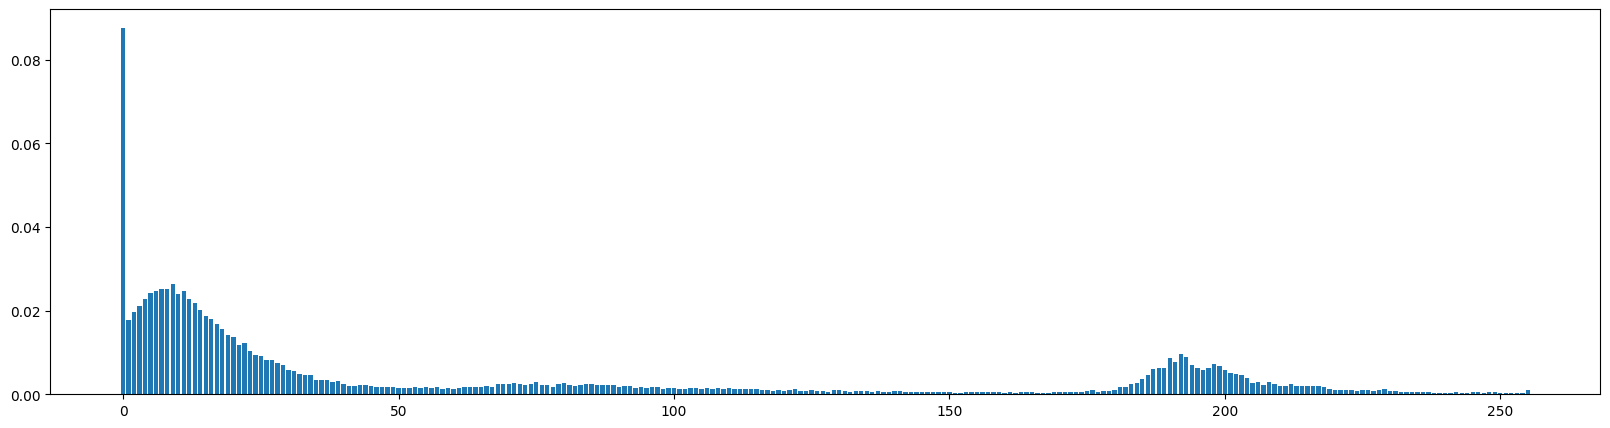

In [25]:
visualize_hist(hist_b)

In [26]:
assert((hist_gray == hist_cv).all())

In [27]:
print(f"difference = {np.setdiff1d(hist_cv, hist_gray)}\n dtypes = {hist_cv.dtype} {hist_gray.dtype} \n shapes = {hist_cv.shape} {hist_gray.shape}")

difference = []
 dtypes = float32 float64 
 shapes = (256,) (256,)


## Вопрос 3

 Что можно сказать об изображении по его гистограмме?

**Ответ:** Можно оценить количество и разнообразие оттенков изображения, а также общий уровень яркости изображения

## Вопрос 4

Допустим, вы смотрите некоторый фильм и для текущего кадра выводите его гистограмму. Как будет меняться эта гистограмма с течением времени?

**Ответ:** Если сцена переходит от ярко освещенной к темной (или наоборот), гистограмма, соответственно, сместится влево или вправо. Но вообще, даже в пределах одной сцены гистограмма может меняться из-за движения камеры, изменения фокуса, освещения и тд. Например, в сцене с быстрым движением или мигающим светом гистограмма будет непрерывно изменяться.

## Упражнение 4: JPEG и гистограмма

Исследуйте, как влияет степень сжатия алгоритма JPEG на вид гистограммы изображения.

Используйте черно-белое изображение `img_gray`. Визуализируйте степени сжатия 90, 60, 30, 5.

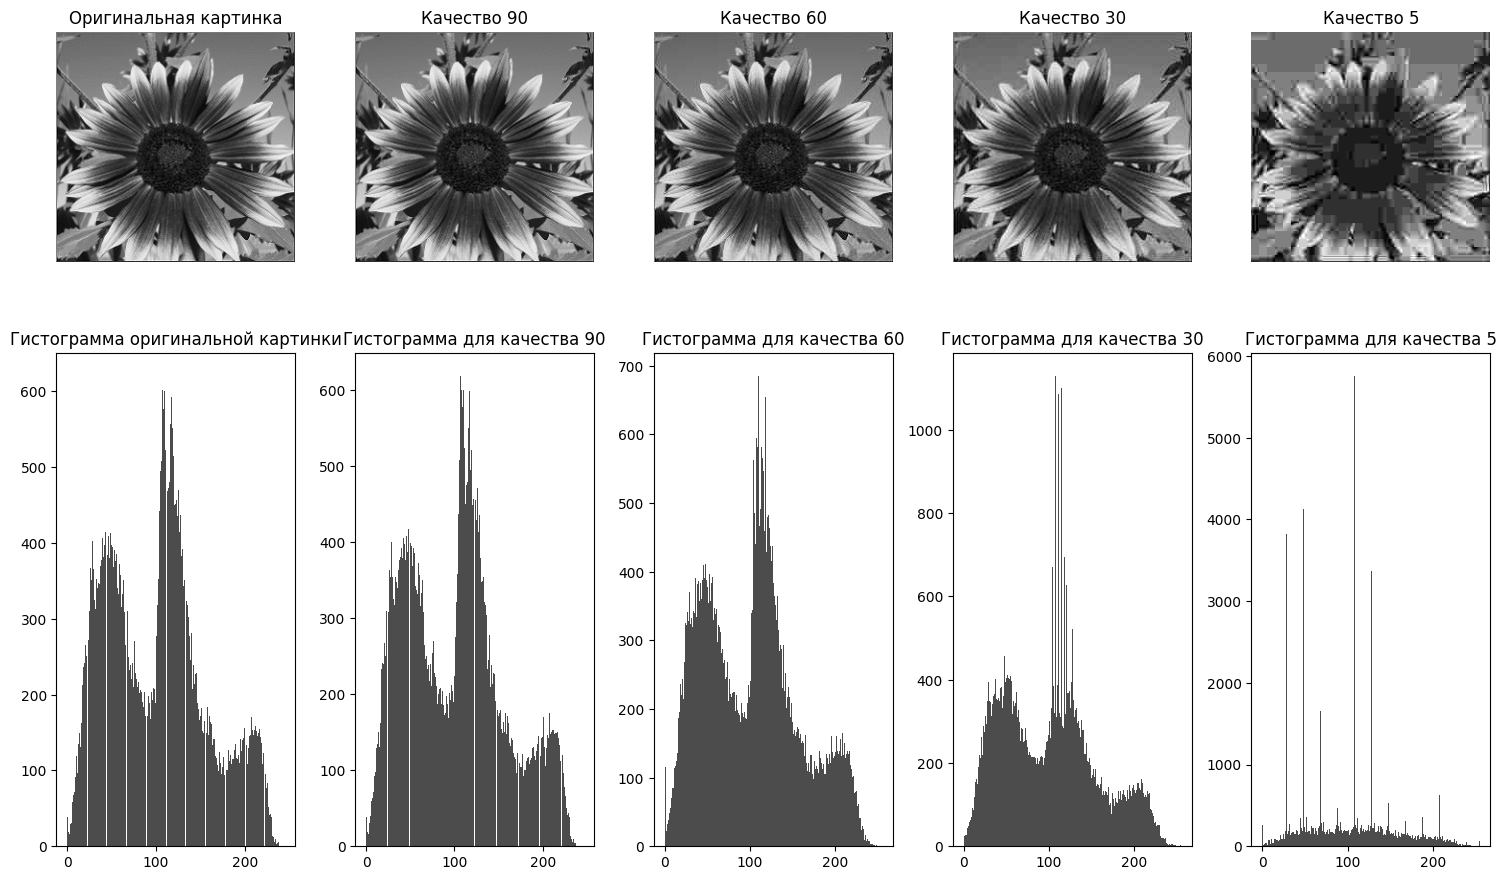

In [28]:
qualities = [90, 60, 30, 5]
compressed_images = []

for quality in qualities:
    result, img_encoded = cv2.imencode('.jpg', img_gray, [int(cv2.IMWRITE_JPEG_QUALITY), quality])
    img_decoded = cv2.imdecode(img_encoded, cv2.IMREAD_GRAYSCALE)
    compressed_images.append(img_decoded)

plt.figure(figsize=(15, 10))

plt.subplot(2, 5, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Оригинальная картинка')
plt.axis('off')

plt.subplot(2, 5, 6)
plt.hist(img_gray.flatten(), bins=256, color='black', alpha=0.7)
plt.title('Гистограмма оригинальной картинки')

for i in range(4):
    plt.subplot(2, 5, i + 2)
    plt.imshow(compressed_images[i], cmap='gray')
    plt.title(f'Качество {qualities[i]}')
    plt.axis('off')

    plt.subplot(2, 5, i + 7)
    plt.hist(compressed_images[i].flatten(), bins=256, color='black', alpha=0.7)
    plt.title(f'Гистограмма для качества {qualities[i]}')

plt.tight_layout()
plt.show()

## Упражнение 5: Сегментация

На загруженном аэроортофотоплане выделите зеленые насаждения. Для этого постройте бинарную маску, где 1 будет отвечать наличию насаждений в данном пикселе, 0 - их отсутствию, и визуализируйте её. А также рассчитайте, какую долю изображения занимают зеленые насаждения. С какой ошибкой (погрешностью) получена эта величина?

Подсказка: вам должно помочь HSV пространство и гистограмма. Погрешность может быть оценена на глаз, по вашей неуверенности в определении порога отделения классов 'зеленые насаждения'/'прочее'.

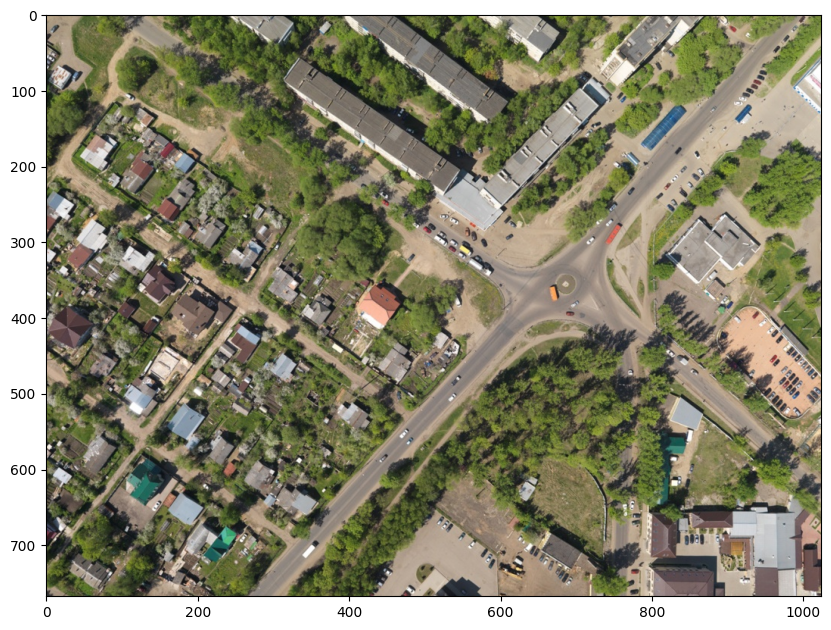

In [29]:
aerial_image = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10, 10])
plt.imshow(aerial_image)

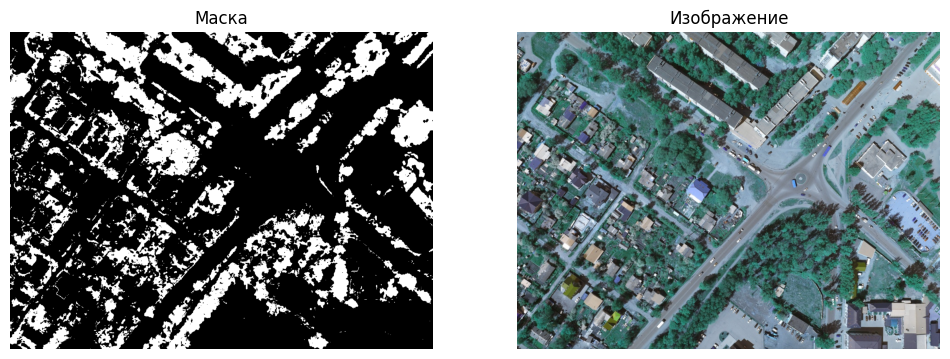

Доля изображения, занимаемая зелеными насаждениями: 25.19%


In [30]:
hsv_img = cv2.cvtColor(aerial_image, cv2.COLOR_BGR2HSV)

lower_green = np.array([40, 40, 40])
upper_green = np.array([85, 255, 255])

mask = cv2.inRange(hsv_img, lower_green, upper_green)

total_pixels = aerial_image.shape[0] * aerial_image.shape[1]
green_pixels = np.count_nonzero(mask)
green_area_ratio = green_pixels / total_pixels

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.title('Маска')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(aerial_image, cv2.COLOR_BGR2RGB))
plt.title('Изображение')
plt.axis('off')

plt.show()

print(f'Доля изображения, занимаемая зелеными насаждениями: {green_area_ratio:.2%}')

Погрешность я оцениваю очень примерно. Данный метод плохо работает с травой и тенями, судя по всему. Считаю, что она находися в пределах 5-10%

# Упражнение 6: Интегральное изображение
Напомним, что интегральным изображением называется следующая функция:
$$
    I(x, y) = \sum_{i = 0}^{x} \sum_{j = 0}^{y} f(i, j)
$$
С помощью интегрального изображения можно за $O(1)$ вычислять сумму интенсивностей в произвольной прямоугольной области. Требуется реализовать расчет интегрального изображения, а также быстрый расчет сумм интенсивностей в прямоугольнике заданном верхним левым углом, шириной и высотой $x, y, w, h$.

In [31]:
class IntegralImage:

    def __init__(self, img):
        assert(len(img.shape) == 2)
        self.img = img
        
        self.height, self.width = img.shape
        self.integral_img = np.zeros((self.height+1, self.width+1))

        for i in range(1, self.height+1):
            for j in range(1, self.width+1):
                self.integral_img[i, j] = self.img[i - 1, j - 1] + self.integral_img[i - 1, j] + self.integral_img[i, j - 1] - self.integral_img[i - 1, j - 1]


    def sum(self, x, y, w, h):
        return self.integral_img[y, x] + self.integral_img[y + h, x + w] - self.integral_img[y, x + w] - self.integral_img[y + h, x]


In [32]:
I = IntegralImage(img_gray)

In [33]:
x, y, w, h = 0, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

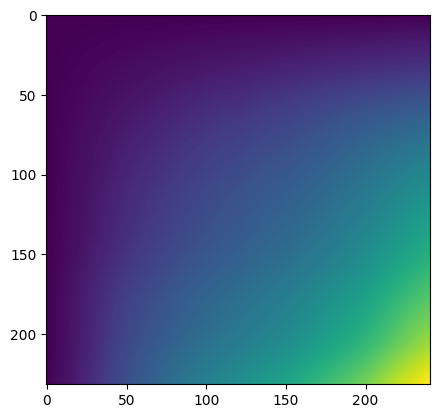

In [34]:
plt.imshow(I.integral_img)

## Вопрос 5

В каких задачах может потребоваться использовать интегральное изображение?

**Ответ:** Например, распознавание лиц, сегментация объектов, распознавание жестов 

## Вопрос 6

Какому методу решения задачи в программировании следует метод расчета интегрального изображения?

**Ответ:** метод динамического программирования 